In [38]:
import numpy as np
import cv2 as cv
import os
import re
from Visualization import *

In [84]:
video_dir = 'Lane_Parameters\Lane_Videos'
lane_dir = 'Lane_Parameters\Lane_Parameters'
def get_video(video_num):
    return os.path.join(video_dir, 'IMG_'+ video_num + '.MOV')


def get_lanes(video_num, frame_num):
    
    p = re.compile('[0-9]*,[0-9]*')
    file = open(os.path.join(lane_dir, video_num, str(frame_num) + '.txt'))
    lanes = []

    for line in file:
        points = p.findall(line)
        for i, point in enumerate(points):
            points[i] = tuple(map(int, point.split(',')))
        lanes.append(points)
    file.close()
    return lanes

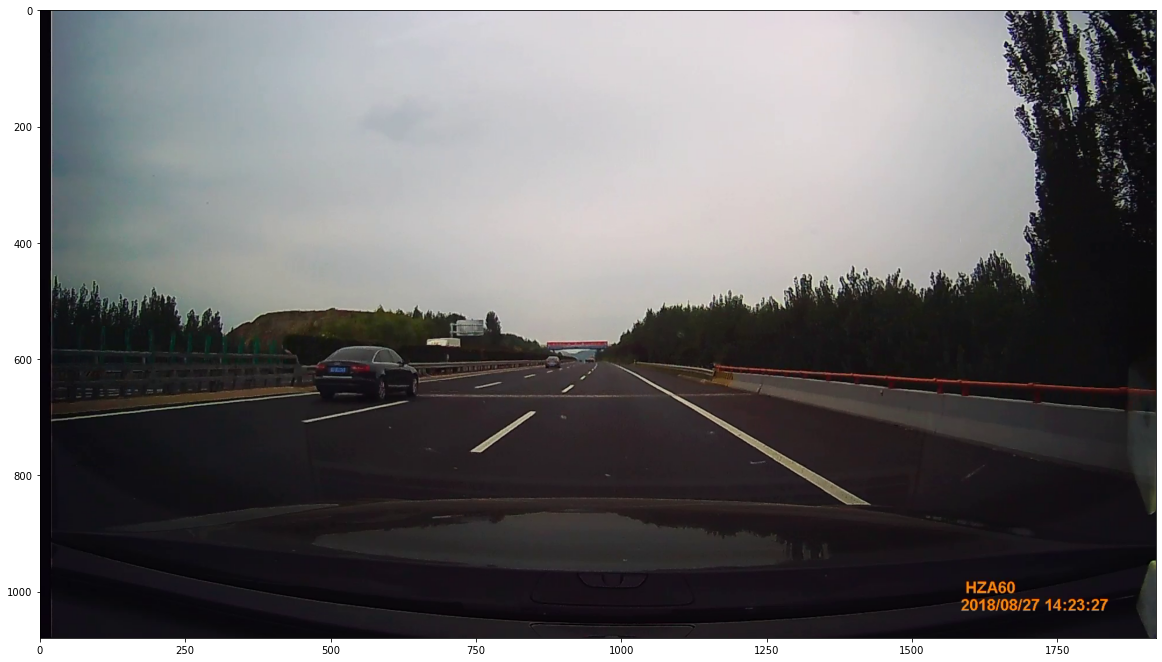

In [97]:
video_num = '0250'
vid = cv.VideoCapture(get_video(video_num))

frame_num = 5000

for i in range(frame_num):
    sucess, orignal_frame = vid.read()
    if not sucess:
        break
vid.release()
img = orignal_frame.copy()
PLTdraw(orignal_frame)

In [101]:
def draw_dots(img, dots, radius=3, color=(255,0,0), thickness=2):
    for dot in dots:
        img = cv.circle(img, dot, 3, color, thickness)
    return img

def draw_lanes(img, lanes, radius=3, colorLst=None, thickness=2):
    for lane in lanes:
        color = None
        if colorLst is None:
            color = random_color()
        img = draw_dots(img, lane, radius, color, thickness)
    return img

In [103]:
import random as rand
def random_color():
    return rand.randint(0,255), rand.randint(0,255), rand.randint(0,255)

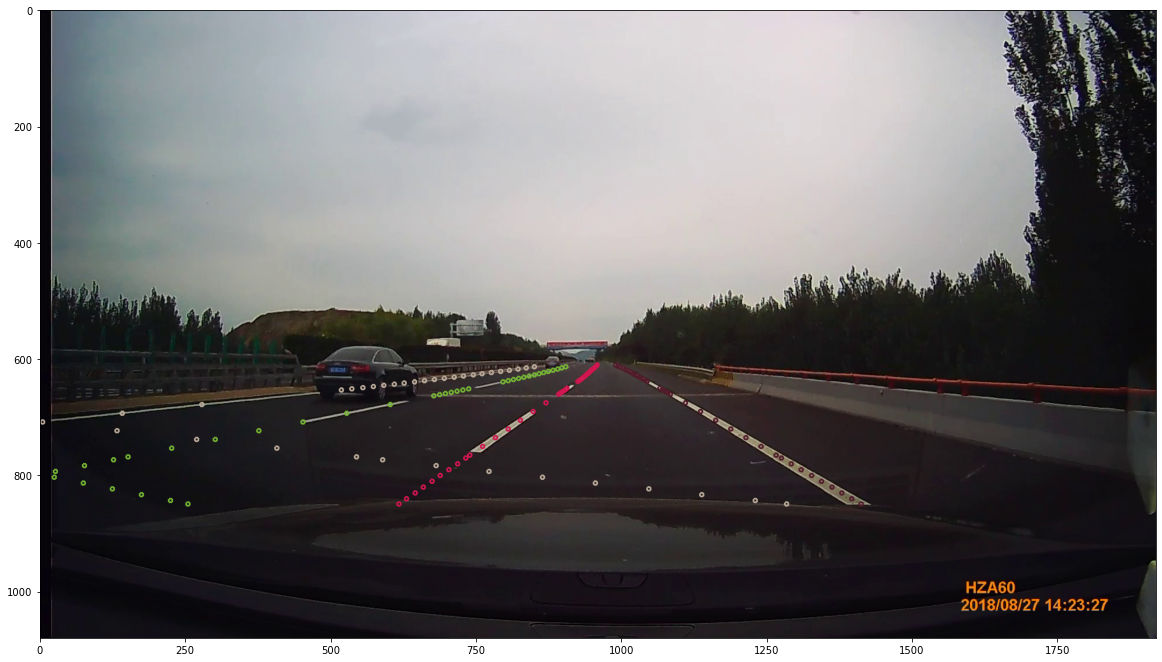

In [104]:
lanes = get_lanes(video_num, frame_num)
doted = draw_lanes(img, lanes)
PLTdraw(doted)

## Segmented Data